In [1]:
import get_data as gdd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import os
import numpy as np

/Users/tara/Documents/SJSU/2023Fall/CS_122/Project/cs122-project/get_data.py:63: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 63 of the file /Users/tara/Documents/SJSU/2023Fall/CS_122/Project/cs122-project/get_data.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup=BeautifulSoup(content)


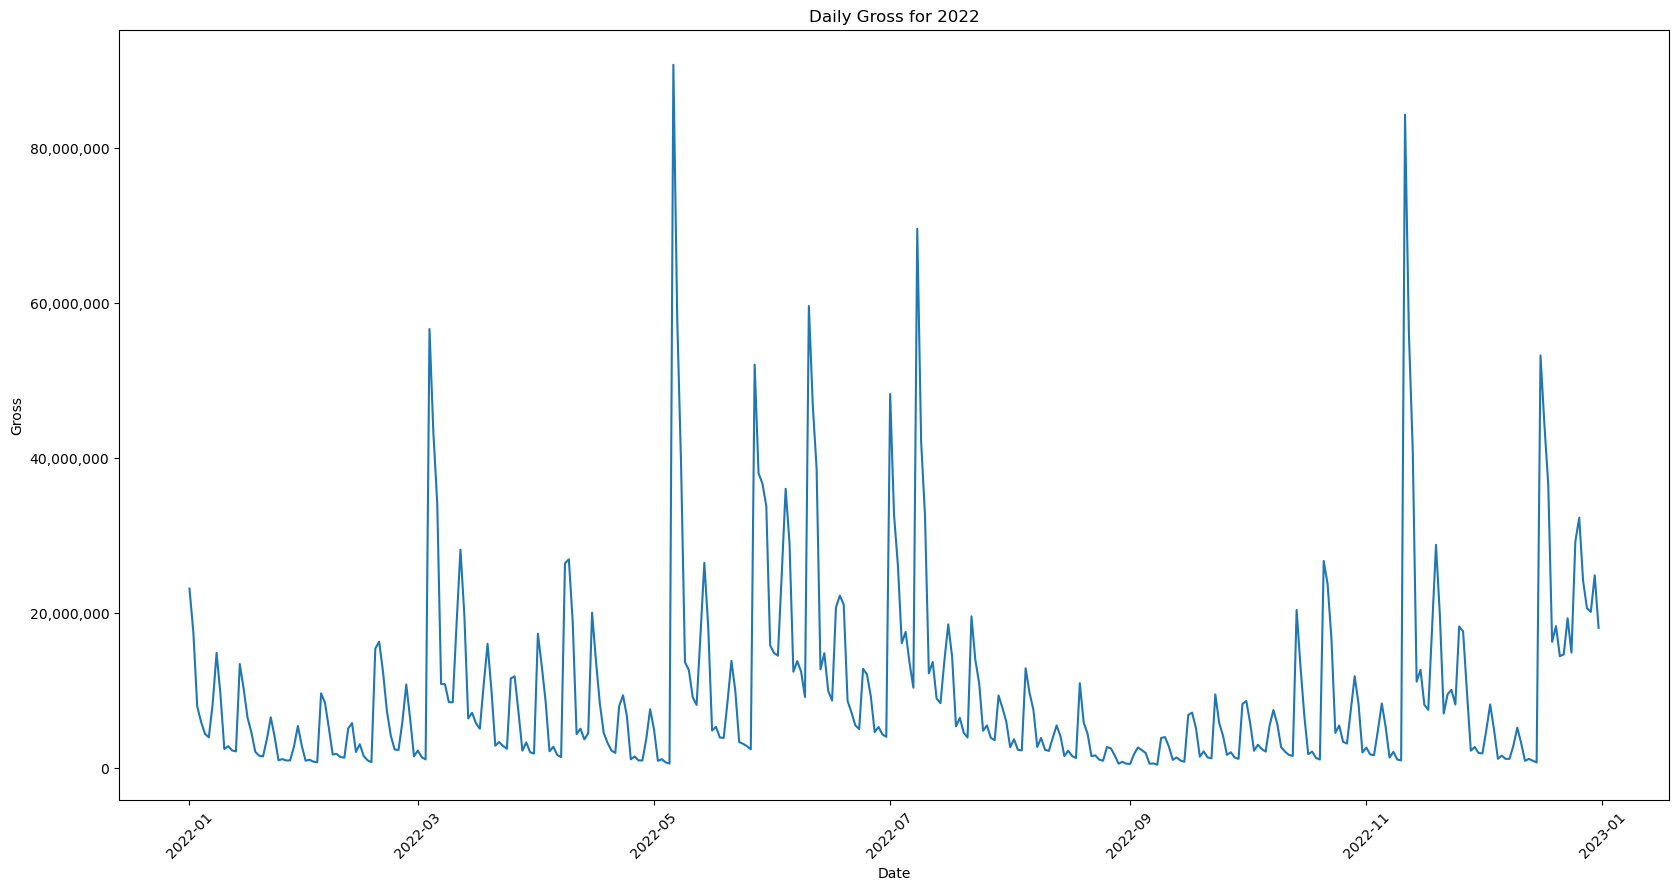

In [2]:
# Specify a year and get back a dataframe with daily data
# timeseries will be stored as daily_gross.png
year = '2022'
df = gdd.get_daily_data_for_year(year)
gdd.plot_daily_data_by_year(df, year)

c:\Users\EzraHsieh\Documents\SJSU\CS_122\Project\cs122-project\get_data.py:16: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 16 of the file c:\Users\EzraHsieh\Documents\SJSU\CS_122\Project\cs122-project\get_data.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup=BeautifulSoup(content)


                  Date Occasion  Top10Gross PercentChangeTop10  OverallGross  \
0   Dec 30-Jan 5, 2023            174584090             -27.9%     176585127   
1            Dec 23-29            242130042                +4%     246487640   
2            Dec 16-22            232765223            +414.8%     236324722   
3             Dec 9-15             45214764               -31%      51441972   
4              Dec 2-8             65533485             -39.4%      71808894   
5         Nov 25-Dec 1            108155850             -31.7%     114262463   
6            Nov 18-24            158366183             -37.4%     166806980   
7            Nov 11-17            252999294              +255%     256405792   
8             Nov 4-10             71262866             -17.4%      78067175   
9         Oct 28-Nov 3             86294773             -39.4%      91912422   
10           Oct 21-27            142445560             +56.8%     147141895   
11           Oct 14-20             90872

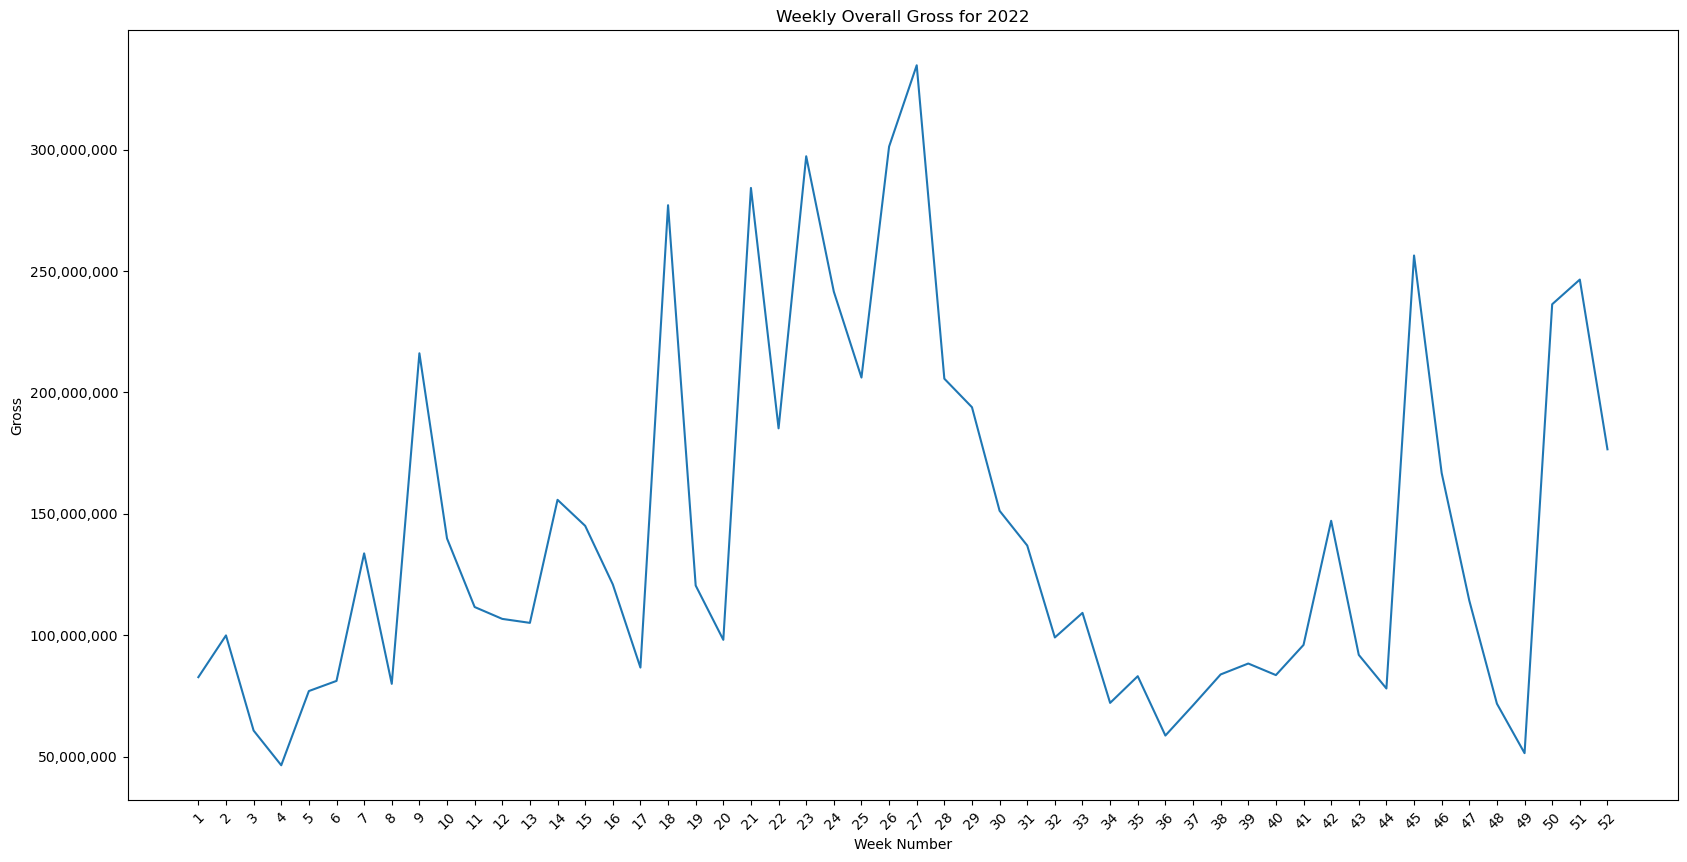

In [5]:
# Specify a year and get back a dataframe with daily data
# timeseries will be stored as daily_gross.png
year = '2022'
df = gdd.get_weekly_data_for_year(year)
print(df)
gdd.plot_weekly_data_by_year(df, year)

### ugly graph

In [9]:
year = '2022'
df = gdd.get_weekly_data_for_year(year)

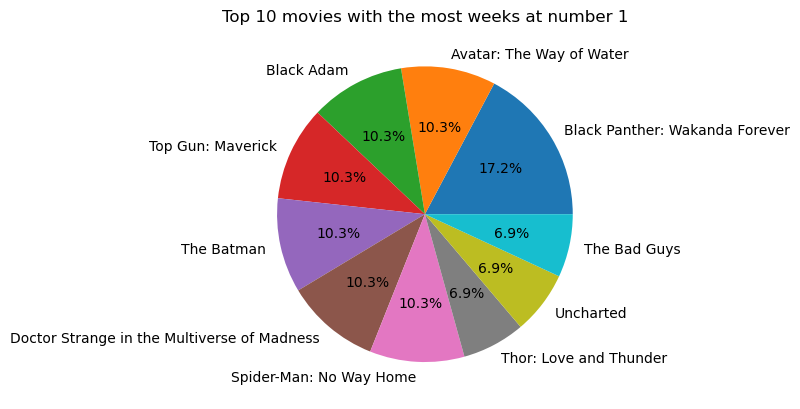

In [6]:
# create a pie chart
import matplotlib.pyplot as plt

# Step 1 & 2
top_10_movies = df['Number1Release'].value_counts().head(10)

# Step 3, 4 & 5
plt.pie(top_10_movies, labels = top_10_movies.index, autopct='%1.1f%%')
plt.title('Top 10 movies with the most weeks at number 1')
plt.show()

### progress

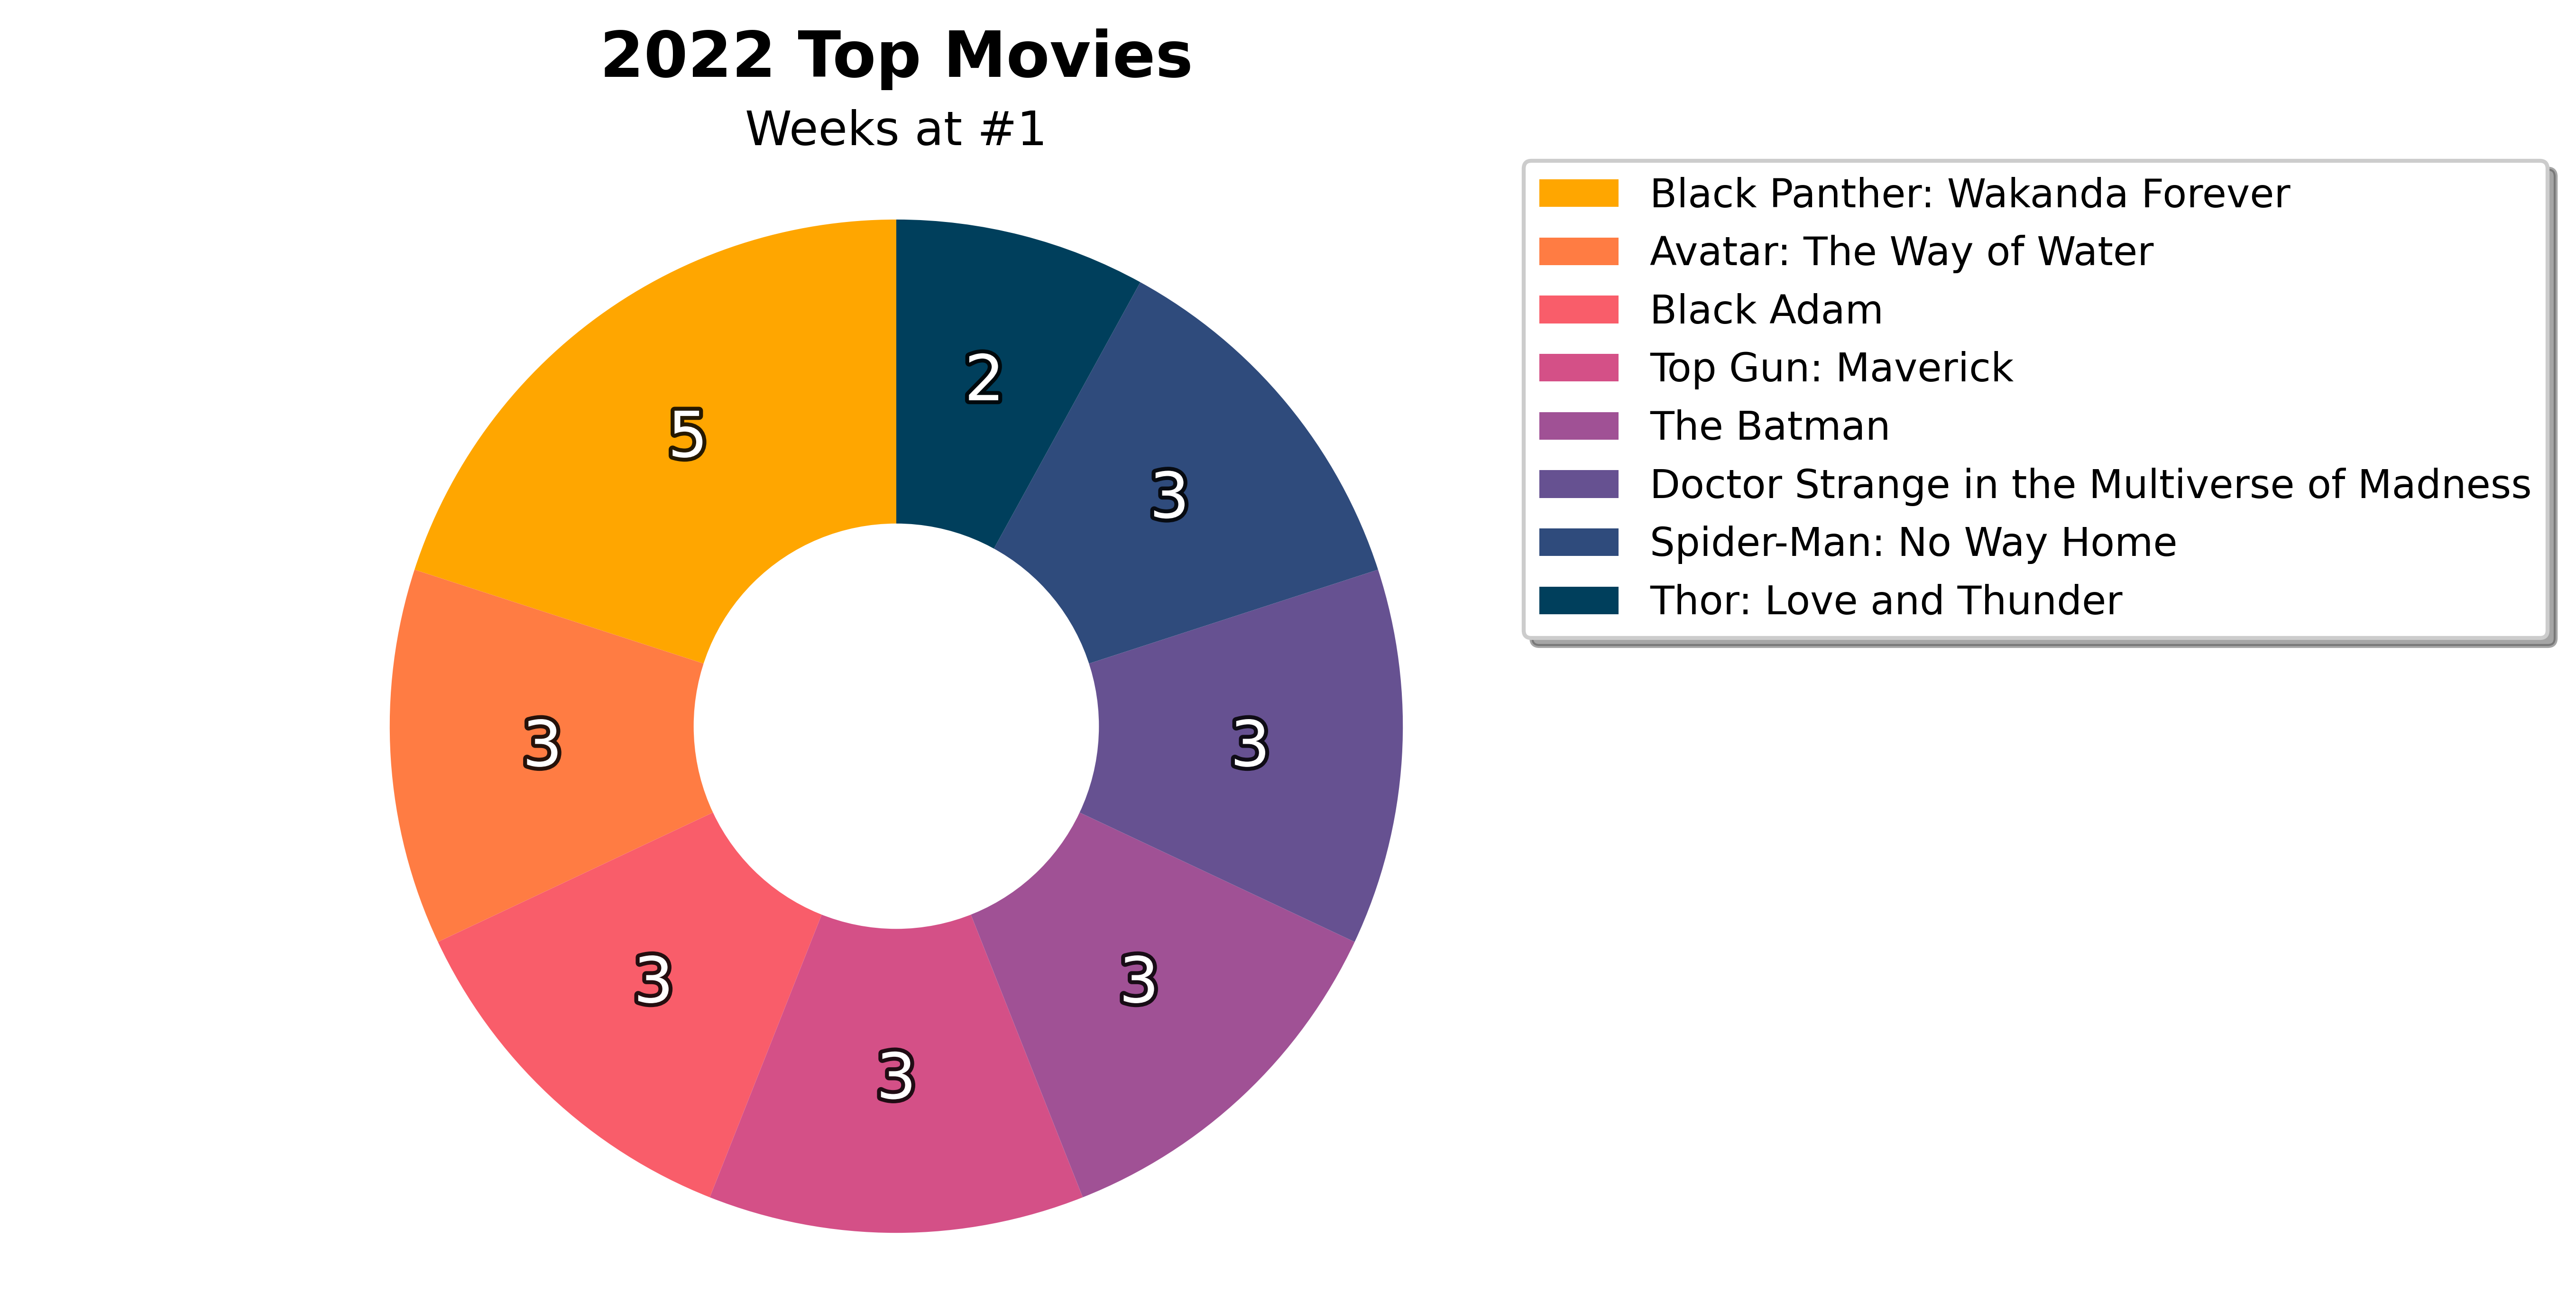

<Figure size 2000x2000 with 0 Axes>

In [17]:
year = 2022
gdd.get_top_movies_for_year_pie_chart(str(year))


# show the png chart (following code only needed to render in Jupyter notebook)
from IPython.display import Image
Image(filename=os.path.join('static','top_8_movies_pie.png'))

In [1]:
import get_data as gdd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as pe
import os
import numpy as np

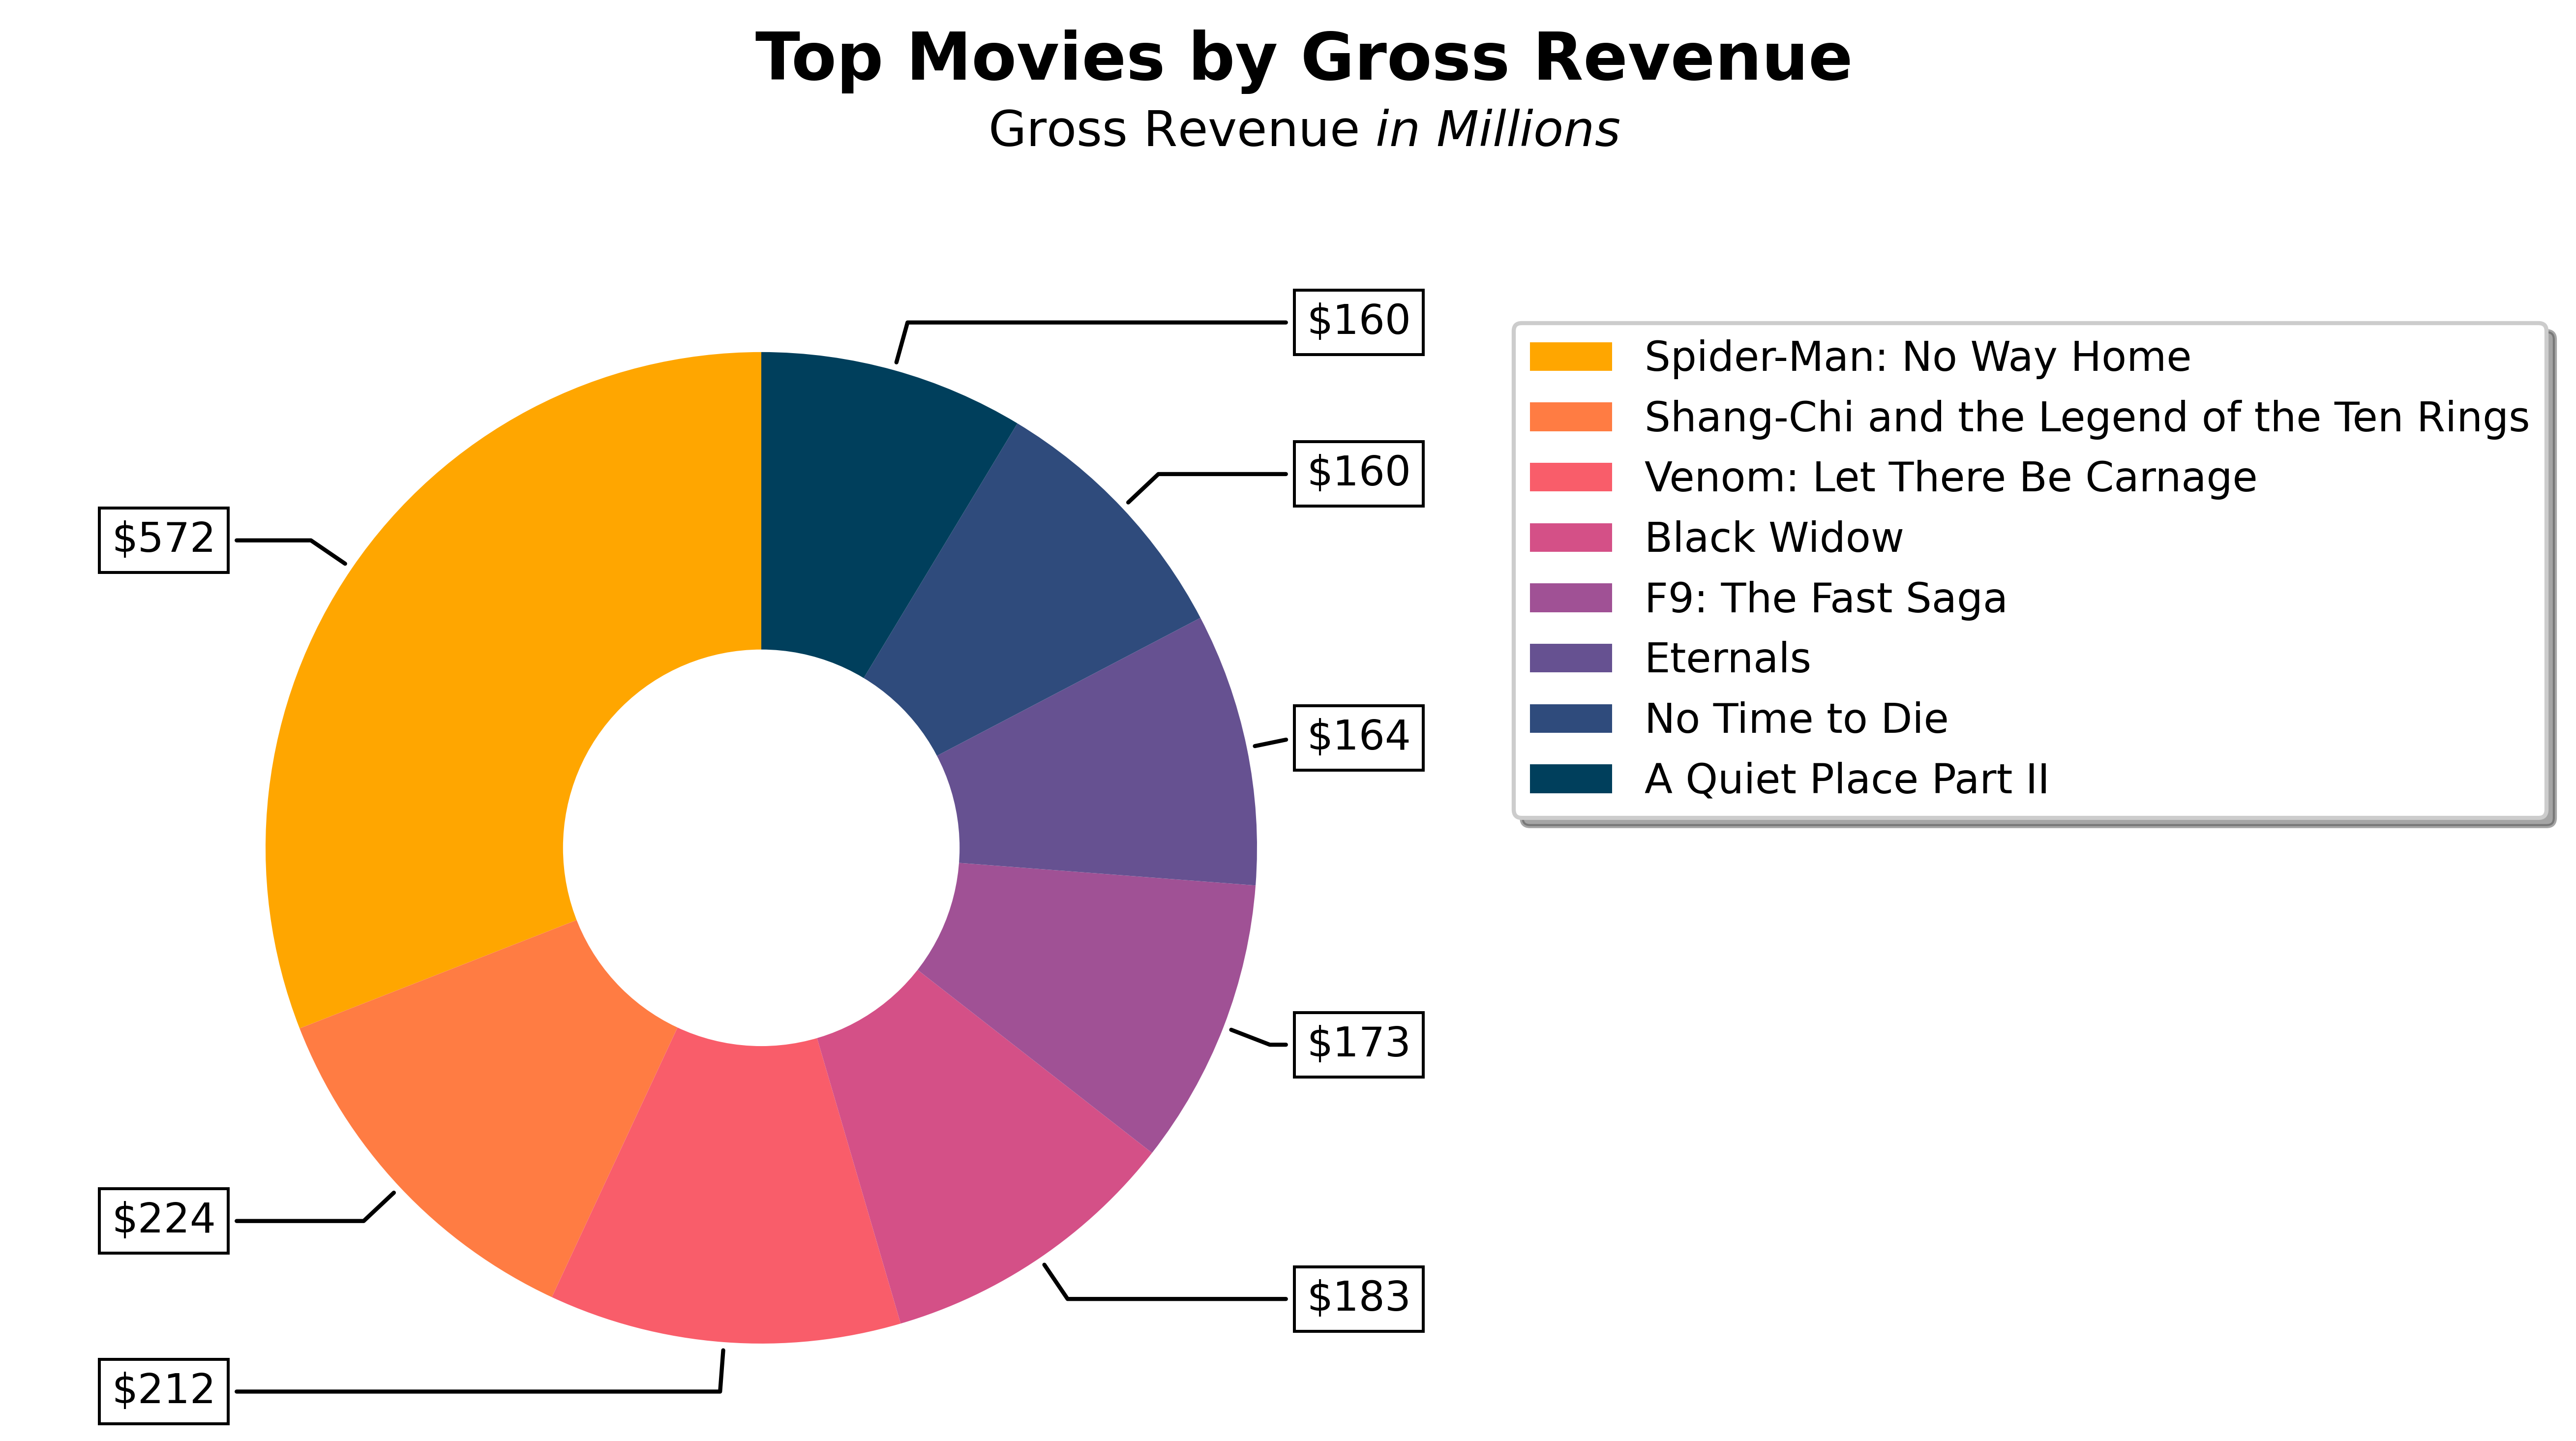

<Figure size 2000x2000 with 0 Axes>

In [5]:
# year = 2022
gdd.run_get_pie_plot("2021")

# show the png chart (following code only needed to render in Jupyter notebook)
from IPython.display import Image
Image(filename=os.path.join('static','top_8_movies_pie.png'))

# Archive

In [ ]:
# puts number of weeks at #1 on the pie chart, but the ranking is inaccurate.

def get_top_movies_for_year_pie_chart(year='2023'):
    '''Saves a pie chart showing the top 8 movies for a given year, based on the number of weeks at #1
    param: year (str) - the year to get the top movies for. default is 2023
    return: None
    saves a png file to static/top_8_movies_pie.png'''

    df = gdd.get_weekly_data_for_year(year)
    top_8_movies = df['Number1Release'].value_counts().head(8)

    palette = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
    palette.reverse()

    labels = top_8_movies.index
    data = top_8_movies

    plt.figure(figsize=(20,20))

    fig1, ax1 = plt.subplots()

    # Plot the pie chart
    ax1.pie(data, colors=palette, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), pctdistance=0.7, startangle=90, 
            textprops={'fontsize': 16, 'color': 'white', 'alpha': 1, 'path_effects': [pe.withStroke(linewidth=2, foreground="black", alpha = 0.85)]}, 
            shadow=False)

    # Draw circle
    centre_circle = plt.Circle((0,0),0.4,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  

    # Add title and subtitle
    plt.suptitle(year + ' Top Movies', fontsize=16, fontweight='bold', y=0.95)
    plt.title('Weeks at #1', fontsize=12)

    plt.tight_layout()
    plt.legend(labels, loc='upper left', bbox_to_anchor=(0.85, 1.025), shadow=True, ncol=1)
    plt.savefig(os.path.join('static','top_8_movies_pie.png'), dpi=600, bbox_inches='tight')
    plt.close()

    return 